# 4장 넘파이 3편

## 주요 내용

- 어레이 활용: 정렬, 확률과 통계, 선형대수, 난수 생성

## 기본 설정

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np
# 램덤 시드
np.random.seed(12345)
# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt
# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 4.2 항목별 함수 적용 (p. 158)

어레이를 함수의 인자로 사용하면 해당 함수는 어레이 항목 각각에 대해 적용된다.

__참고:__ 이런 기능을 넘파이 내부에서 지원하는 함수가 `ufunc()`이며, __유니버설__ 함수라 부른다.

아래 1차원 어레이를 제곱근 함수와 지수 함수의 인자로 사용하면 각 항목의 제곱근과 지수값으로 이루어진
동일한 모양의 어레이가 생성된다.

In [3]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [5]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

여러 개의 어레이를 인자로 받는 함수에 대해서도 동일한 방식으로 작동한다.
예를 들어, `maximum()` 함수는 항목별 최댓값으로 이루어진 어레이를 반환한다.

In [8]:
x = np.random.randn(8)
y = np.random.randn(8)

In [9]:
x

array([-2.0016, -0.3718,  1.669 , -0.4386, -0.5397,  0.477 ,  3.2489,
       -1.0212])

In [10]:
y

array([-0.5771,  0.1241,  0.3026,  0.5238,  0.0009,  1.3438, -0.7135,
       -0.8312])

In [11]:
np.maximum(x, y)

array([-0.5771,  0.1241,  1.669 ,  0.5238,  0.0009,  1.3438,  3.2489,
       -0.8312])

특정 함수는 여러 개의 어레이를 반환한다. 
예를 들어, `np.modf()` 함수는 부동소수점 어레이를 인자로 받으면
정수 부분과 소수 부분으로 구성된 동일한 모양(shape)의 두 개의 어레이(로 이루어진 튜플)를 반환한다.
따라서 정수들의 나눗셈 결과를 몫과 나머지로 보여주는 것과 동일한 효과를 낸다.

In [115]:
arr = (np.arange(8)/3).reshape((4,2))
arr

array([[0.    , 0.3333],
       [0.6667, 1.    ],
       [1.3333, 1.6667],
       [2.    , 2.3333]])

In [116]:
remainder, whole_part = np.modf(arr)

In [117]:
remainder

array([[0.    , 0.3333],
       [0.6667, 0.    ],
       [0.3333, 0.6667],
       [0.    , 0.3333]])

In [118]:
whole_part

array([[0., 0.],
       [0., 1.],
       [1., 1.],
       [2., 2.]])

이렇게 항목별 함수 적용을 지원하는 넘파이 함수는 모두 
`out` 키워드 인자를 사용하여 계산 결과를 지정된 변수에 저장할 수 있다.
단, 키워드 인자로 사용될 수 있는 변수는 
이미 동일한 모양의 어레이를 가리키는 변수로 선언되어 있어야 한다.

예를 들어, (4, 2) 모양의 2차원 어레이를 `arr2` 변수가 가리키도록 하자.

In [119]:
arr2 = (np.random.randn(8) * 5).reshape((4, 2))
arr2

array([[-2.2028, -1.5068],
       [ 2.494 , -4.12  ],
       [ 6.6028,  2.5398],
       [-3.2672,  0.9349]])

이제 `arr2`에 제곱근 함수를 적용한 결과를 `arr` 변수가 가기키도록 하려면 아래와 같이 한다.

__주의사항:__ 제곱근 함수는 음수에 대해서는 경고를 생성하며, 해당 항목은 `nan`으로 표시한다. 
nan은 not a number, 즉, 숫자가 아니다의 의미이다.

In [121]:
np.sqrt(arr2, out=arr)

<ipython-input-121-cefa55e4e7f0>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr2, out=arr)


array([[   nan,    nan],
       [1.5792,    nan],
       [2.5696, 1.5937],
       [   nan, 0.9669]])

`arr` 변수가 위 결과를 가리키고 있음을 확인할 수 있다.

In [122]:
arr

array([[   nan,    nan],
       [1.5792,    nan],
       [2.5696, 1.5937],
       [   nan, 0.9669]])

## 4.3 어레이 중심 프로그래밍 (p. 161)

연산과 함수 호출에 사용되는 넘파이 어레이는 기본적으로 항목 단위로 연산과 함수 호출이 이루어진다.
넘파이 어레이의 이런 특징을 잘 활용하도록 유도하는 프로그래밍을 
__어레이 중심 프로그래밍__(array-oriented programming)이라 한다. 

어레이를 중심으로 프로그래밍을 하면 예를 들어 많은 `for` 반복문을 생략할 수 있으며,
결과적으로 보다 효율적으로 코드를 구현할 수 있다.
또한 구현된 프로그램은 리스트를 이용하는 프로그램보다 빠르고 메모리 효율적으로 실행된다.
여기서는 몇 가지 예제를 이용하여 어레이 중심 프로그래밍을 소개한다. 

### 예제: 2차원 격자(meshgrid) 어레이

-5와 5 사이를 1,000개의 구간으로 나누어 2차원 격자 어레이를 생성하자.

__해결 방법:__

먼저 `np.arange()` 함수를 이용하여 -5와 5 사이의 구간을 1,000개의 구간으로 균등하게 
나누는 어레이를 생성한다.

In [254]:
points = np.arange(-1, 1, 0.1) # 1000 equally spaced points

`np.meshgrid()` 함수는 지정된 1차원 어레이 두 개를 이용하여 격자무늬의 좌표를 생성한다.
즉, 격자에 사용되는 점들의 x 좌표와 y 좌표를 따로따로 모아 두 개의 어레이를 반환한다.

In [255]:
xs, ys = np.meshgrid(points, points2)

In [256]:
xs

array([[-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9],
       [-1. , -0.9, -0.8, -0.7, -0.6, -0.

In [257]:
ys

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
        0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6,
        0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
        0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0

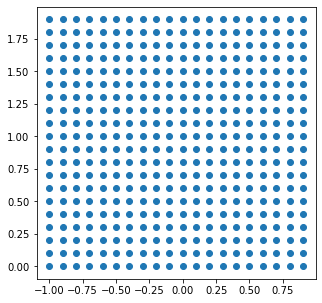

In [258]:
plt.rc('figure', figsize=(5, 5))
plt.scatter(xs, ys)
plt.show()

In [259]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[1.    , 0.9   , 0.8   , 0.7   , 0.6   , 0.5   , 0.4   , 0.3   ,
        0.2   , 0.1   , 0.    , 0.1   , 0.2   , 0.3   , 0.4   , 0.5   ,
        0.6   , 0.7   , 0.8   , 0.9   ],
       [1.005 , 0.9055, 0.8062, 0.7071, 0.6083, 0.5099, 0.4123, 0.3162,
        0.2236, 0.1414, 0.1   , 0.1414, 0.2236, 0.3162, 0.4123, 0.5099,
        0.6083, 0.7071, 0.8062, 0.9055],
       [1.0198, 0.922 , 0.8246, 0.728 , 0.6325, 0.5385, 0.4472, 0.3606,
        0.2828, 0.2236, 0.2   , 0.2236, 0.2828, 0.3606, 0.4472, 0.5385,
        0.6325, 0.728 , 0.8246, 0.922 ],
       [1.044 , 0.9487, 0.8544, 0.7616, 0.6708, 0.5831, 0.5   , 0.4243,
        0.3606, 0.3162, 0.3   , 0.3162, 0.3606, 0.4243, 0.5   , 0.5831,
        0.6708, 0.7616, 0.8544, 0.9487],
       [1.077 , 0.9849, 0.8944, 0.8062, 0.7211, 0.6403, 0.5657, 0.5   ,
        0.4472, 0.4123, 0.4   , 0.4123, 0.4472, 0.5   , 0.5657, 0.6403,
        0.7211, 0.8062, 0.8944, 0.9849],
       [1.118 , 1.0296, 0.9434, 0.8602, 0.781 , 0.7071, 0.6403, 0.5831,
   

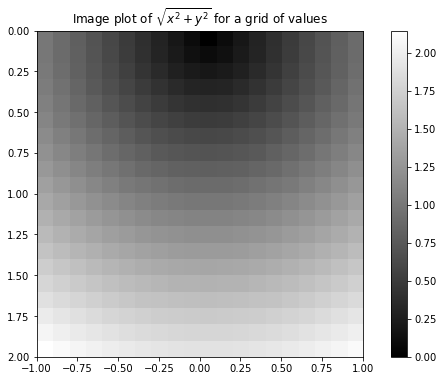

In [261]:
plt.rc('figure', figsize=(10, 6))

plt.imshow(z, cmap=plt.cm.gray, extent=[-1, 1, 2, 0])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

plt.show()

### 4.3.1 삼항식과 어레이

- 163쪽

In [11]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [12]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [13]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [14]:
arr = np.random.randn(4, 4)
arr
arr > 0
np.where(arr > 0, 2, -2)

array([[-2, -2,  2,  2],
       [ 2,  2,  2, -2],
       [-2, -2, -2, -2],
       [ 2, -2,  2, -2]])

In [15]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-1.0212, -0.5771,  2.    ,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.7135],
       [-0.8312, -2.3702, -1.8608, -0.8608],
       [ 2.    , -1.2659,  2.    , -1.0635]])

### 4.3.2 수학/통계 용도 메서드

- 165쪽

In [16]:
arr = np.random.randn(5, 4)
arr
arr.mean()
np.mean(arr)
arr.sum()

-3.5054904004020653

In [17]:
arr.mean(axis=1)
arr.sum(axis=0)

array([-2.0643, -4.8961,  2.4635,  0.9914])

In [18]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [19]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr
arr.cumsum(axis=0)
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### 4.3.3 부울 어레이 메서드: `all()`, `any()`

- 167쪽

In [20]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

49

In [21]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

False

### 4.3.4 정렬

- 168쪽

In [22]:
arr = np.random.randn(6)
arr
arr.sort()
arr

array([-1.8448, -0.777 , -0.4162, -0.2477, -0.1167,  2.0687])

In [23]:
arr = np.random.randn(5, 3)
arr
arr.sort(1)
arr

array([[-0.1106,  1.2274,  1.4402],
       [ 0.7464,  1.9208,  2.2247],
       [-0.8687, -0.6794,  0.7274],
       [-1.2139, -0.9192, -0.4706],
       [-0.8388, -0.5578,  0.4352]])

In [24]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5291806067796911

### 4.3.5 집합 관련 함수

- 169

In [25]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [26]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [27]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 배열 파일 저장 및 읽기

- 171쪽

In [28]:
arr = np.arange(10)
np.save('some_array', arr)

np.load('some_array.npy')

np.savez('array_archive.npz', a=arr, b=arr)

arch = np.load('array_archive.npz')
arch['b']

np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## 4.5 선형 대수

- 172쪽

In [29]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [30]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [31]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [32]:
x @ np.ones(3)

array([ 6., 15.])

In [33]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[ -5.1557,   1.8521,   2.1677,   7.7101, -11.0135],
       [  0.    ,  -5.3862,  -0.7103,  -1.9741,  -2.6194],
       [  0.    ,   0.    ,  -2.8978,   0.4238,   0.1073],
       [  0.    ,   0.    ,   0.    ,  -0.6215,   1.2718],
       [  0.    ,   0.    ,   0.    ,   0.    ,   2.1838]])

## 4.6 난수 생성

- 174쪽

In [34]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.1651, -0.4034, -0.7121,  0.1251],
       [-0.1136, -1.3531, -0.831 ,  0.3652],
       [-0.5447,  0.9779, -0.2564,  0.5108],
       [ 0.7203,  0.3809,  1.0034, -2.3156]])

In [35]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

526 ms ± 9.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.1 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
np.random.seed(1234)

In [37]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

## 4.7 예제: 계단 오르기(Random Walks)

- 176쪽

In [38]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [39]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

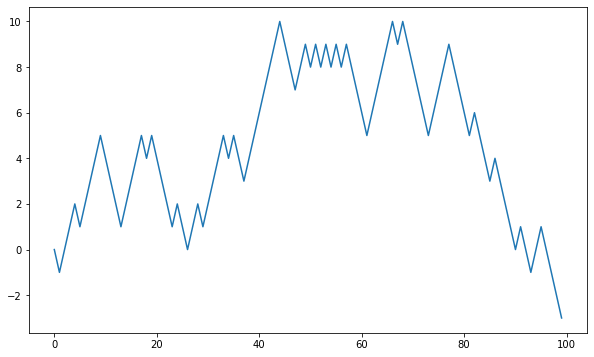

In [40]:
plt.plot(walk[:100])

In [41]:
np.random.seed(12345)

In [42]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [43]:
walk.min()
walk.max()

31

In [44]:
(np.abs(walk) >= 10).argmax()

37

### 4.7.1 한 번에 여러 계단 오르기

- 178쪽

In [45]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [46]:
walks.max()
walks.min()

-133

In [47]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [48]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

In [49]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))